In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

from regression.feature_extraction import FeatureExtractor, LabelLoader
from regression.model import Regressor
import os
import pickle
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
%cd /Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception

/Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception


In [3]:
image_dir = "data/maxdistinct"
test_dir = "data/random"
label = "Trustworthy"

In [69]:
# get face embeddings for all the training data
features_train = FeatureExtractor(image_dir).get_features()
features_train_aligned = FeatureExtractor('{}_aligned'.format(image_dir)).get_features()
print(features_train.shape)
print(features_train_aligned.shape)

(3750, 130)
(3750, 130)


In [71]:
# export to TSV for UMAP, TSNE
for trait in ["Trustworthy", "Likeable", "Competent", "Extroverted", "Attractive", "Dominant", "all"]:
    features_trait = features_train_aligned[
        features_train_aligned["Source"] == "25MaxDistinct_{}-FineGrain".format(trait)
    ] if trait != "all" else features_train_aligned
    features = features_trait.loc[:, range(2,130)]
    meta = features_trait.loc[:, "Face name"]
    features.to_csv("output/features/features_{}.tsv".format(trait), sep="\t", header=False)
    meta.to_csv("output/features/meta_{}.tsv".format(trait), sep="\t", header=True)

In [52]:
features

,2,3,4,5,6,7,8,9,10,11,...,120,121,122,123,124,125,126,127,128,129
0,-1.174784,-0.941566,-0.884329,0.548766,2.046613,-0.396934,0.688382,-0.394899,1.982422,-0.849516,...,0.874173,2.431870,-1.016981,-0.657062,2.355668,-1.262387,-1.398359,0.721940,0.538926,0.161392
1,-0.760669,0.775413,-1.025145,-0.635267,1.649607,-1.190063,0.364011,-0.384965,0.399086,-1.883601,...,0.791571,2.746113,0.867498,-0.621778,1.286932,-1.524056,-0.496940,-0.989719,-0.938413,-1.734283
2,-0.830896,1.214826,-1.075328,-0.675492,0.852515,-0.880181,0.819441,-0.124339,-0.876680,-0.550268,...,0.256124,2.498894,0.354509,-0.884457,0.576560,-1.094290,-1.588486,0.759328,-0.373337,0.194816
3,-1.253792,-0.372510,-0.538456,0.415710,2.711879,-0.899931,1.131233,-0.643618,1.699998,-1.343532,...,0.860649,2.747258,-0.854895,-0.272229,1.558391,-0.581030,-1.470094,-0.074341,-0.259531,-0.137965
4,-1.353796,0.693900,-1.837278,-0.913003,2.396292,-1.324149,0.921844,-0.120712,0.628125,-0.704188,...,0.974574,2.604771,0.546454,1.000151,1.025681,-1.208272,-1.164701,-0.728019,-0.779299,-0.212659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-1.073504,1.758979,-0.661875,-0.313715,1.121512,-0.881010,1.702249,-0.907274,-0.776965,-0.068580,...,1.364669,2.506264,0.969568,-0.527549,0.879178,-1.778235,-0.757953,0.012727,0.187866,-1.527311
3746,-0.584089,1.505130,-1.261803,-0.419505,0.630759,-1.063184,0.687727,-0.308358,-1.102134,-0.254191,...,0.309022,2.460514,0.427823,-0.591949,0.247225,-1.259413,-1.449152,0.737994,-0.314356,-0.044914
3747,-1.250208,-0.035288,-0.880391,0.108769,1.737805,-0.333050,-0.109195,0.241246,1.389775,-0.760039,...,1.277622,2.706331,0.478851,-0.550229,1.257995,-1.433815,-0.907266,-0.227266,0.041670,-0.182004
3748,-0.843561,0.434765,-0.851515,-0.913086,1.740956,-1.086630,0.506521,-0.529055,0.736486,-1.963287,...,0.766366,2.369766,0.766422,-0.139423,1.338382,-1.372215,-0.105426,-1.019303,-0.993037,-1.378526


In [100]:
labels = LabelLoader(image_dir).get_labels()
labels

,Face name,Trustworthy,Dominant,Competent,Likeable,Attractive,Extroverted
0,ID13_Trustworthiness (300 faces)_+300,300.0,NaN,NaN,NaN,NaN,NaN
1,ID2_Trustworthiness (300 faces)_-225,-225.0,NaN,NaN,NaN,NaN,NaN
2,ID21_Trustworthiness (300 faces)_+050,50.0,NaN,NaN,NaN,NaN,NaN
3,ID9_Trustworthiness (300 faces)_+225,225.0,NaN,NaN,NaN,NaN,NaN
4,ID5_Trustworthiness (300 faces)_+250,250.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3745,ID25_Extroverted (300 faces)_+250,NaN,NaN,NaN,NaN,NaN,250.0
3746,ID21_Extroverted (300 faces)_+050,NaN,NaN,NaN,NaN,NaN,50.0
3747,ID17_Extroverted (300 faces)_-300,NaN,NaN,NaN,NaN,NaN,-300.0
3748,ID2_Extroverted (300 faces)_+175,NaN,NaN,NaN,NaN,NaN,175.0


## Embedding Importance

First task: which features in the embedding are most influential for a) regression and b) classification?

In [79]:
from regression.api import merge_x_y

df = merge_x_y(features_train, labels)
df_aligned = merge_x_y(features_train_aligned, labels)
df.describe()

NameError: name 'labels' is not defined

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold

reg = Regressor(df, label)
reg.fit(split=False)
reg_aligned = Regressor(df_aligned, label)
reg_aligned.fit(split=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
def validate_reg(reg, verbose=True):
    score = cross_validate(reg.reg, reg.X, reg.y, cv=kf, scoring=['explained_variance', 'neg_root_mean_squared_error'])
    if verbose:
        print("Explained Variance = {}".format(score['test_explained_variance'].mean()))
        print("-RMSE = {}".format(score['test_neg_root_mean_squared_error'].mean()))
    return score
validate_reg(reg)

Explained Variance = 0.9827838324118818
-RMSE = -23.524373467491884


{'fit_time': array([1.94288206, 1.91320896, 1.92126203, 1.92700481, 1.92297411,
        1.94057107, 1.96533108, 1.9761281 , 1.9879849 , 1.96233273]),
 'score_time': array([0.00880003, 0.00890112, 0.00876117, 0.00877595, 0.0085659 ,
        0.00863791, 0.00958204, 0.00875378, 0.00893807, 0.0094502 ]),
 'test_explained_variance': array([0.97956872, 0.9829944 , 0.98612572, 0.98077068, 0.98499651,
        0.98504084, 0.97576872, 0.98186916, 0.98277325, 0.98793032]),
 'test_neg_root_mean_squared_error': array([-25.34179057, -25.24754428, -22.56006093, -26.85700302,
        -23.56119607, -20.97024101, -25.74068106, -22.03975971,
        -23.27913973, -19.6463183 ])}

In [104]:
validate_reg(reg_aligned)

Explained Variance = 0.9713083134785976
-RMSE = -30.318994243049367


{'fit_time': array([2.02727389, 2.07134414, 2.01914692, 2.02460432, 2.02914691,
        2.10167599, 1.99877024, 2.02971601, 2.0189352 , 2.01523709]),
 'score_time': array([0.00889921, 0.00862503, 0.00872922, 0.00881791, 0.00947309,
        0.00894499, 0.00882292, 0.00964403, 0.00875998, 0.00870872]),
 'test_explained_variance': array([0.9737946 , 0.9686316 , 0.97253196, 0.96013737, 0.97881396,
        0.96854098, 0.96376716, 0.97429291, 0.97243849, 0.98013411]),
 'test_neg_root_mean_squared_error': array([-28.69686256, -33.52776627, -31.88667309, -38.11251097,
        -27.91149561, -30.9216133 , -31.23770726, -26.2480414 ,
        -29.34658028, -25.30069169])}

What do the regression feature importances look like?
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [105]:
# importance metrics done for the regressor trained on non-aligned images
reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
reg_imp

,0
10,0.518202
47,0.156694
27,0.083952
12,0.022986
111,0.017316
...,...
120,0.000281
84,0.000280
114,0.000266
54,0.000207


Is it the same for classification?

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import copy

def binarize(y, threshold=0):
    return (y > threshold).astype(int)

def interpret_binary(y):
    return "Positive" if y else "Negative"

## Trained on non-aligned data ##

# clf = RandomForestClassifier(n_estimators=100)
# also tried KNN - no difference
# clf = KNeighborsClassifier(n_neighbors=5)
clf = LogisticRegression(max_iter=1000)
X = reg.X
y = reg.y
# convert y to binary
y = binarize(y)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=kf).mean()

0.9486943164362518

In [107]:
## Trained on aligned data ##
clf_aligned = LogisticRegression(max_iter=1000)
X_al = reg_aligned.X
y_al = reg_aligned.y
y_al = binarize(y_al)
clf_aligned.fit(X_al, y_al)
cross_val_score(clf_aligned, X_al, y_al, cv=kf).mean()

0.9598566308243728

Out-of-sample accuracy?
(Trying without normalization in case that's causing a problem - turns out, no difference.)

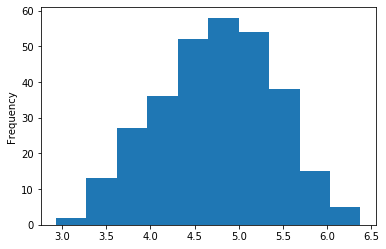

In [81]:
features_test = FeatureExtractor(test_dir).get_features()
features_test_aligned = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
labels_test = LabelLoader(test_dir).get_labels(normalization=False).dropna()
df_test = merge_x_y(features_test_aligned, labels_test)
labels_test["Trustworthy"].plot.hist()

In [83]:
# export to TSV for UMAP, TSNE
features = df_test.loc[:, range(2,130)]
meta = df_test.loc[:, "Face name":"Extroverted"]
features.to_csv("output/features/features_random.tsv", sep="\t", header=False)
meta.to_csv("output/features/meta_random.tsv", sep="\t", header=True)

In [115]:
X_test = Regressor.make_X(features_test)
X_test_al = Regressor.make_X(features_test_aligned)
y_test = binarize(labels_test[label], threshold=labels_test[label].mean())
labels_test_aligned = merge_x_y(features_test_aligned, labels_test)[label]
y_test_al = binarize(labels_test_aligned, threshold=labels_test_aligned.mean())

In [116]:
clf.score(X_test, y_test)

0.48333333333333334

In [117]:
clf_aligned.score(X_test_al, y_test_al)

0.44

In [118]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.4600000000000001

Feature importance?

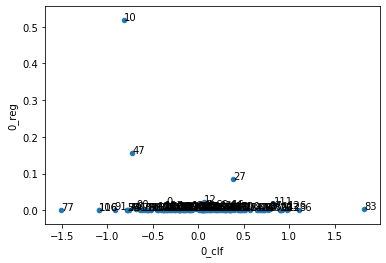

In [119]:
import matplotlib.pyplot as plt

# for random forest
# clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
# for coefs
clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
fig, ax = plt.subplots()
imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
for k, v in imps.iterrows():
    ax.annotate(k, v)

Observation: the same two embeddings are the most important (10 and 47). Is this true for other labels?

Answer: barely. Not sure that these importances are significant - how can we trace them back to the original images, given that they're embeddings?

Attractive


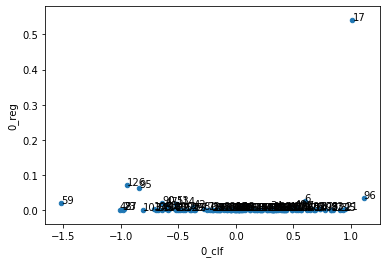

Competent


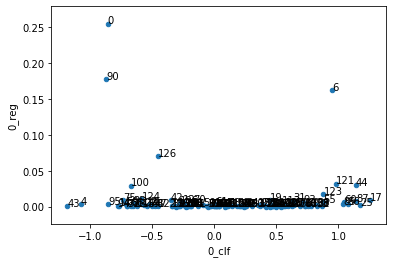

Dominant


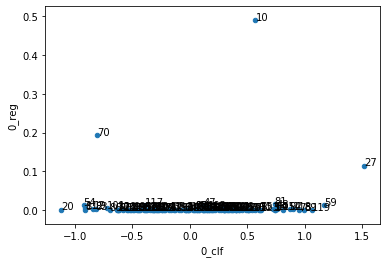

Extroverted


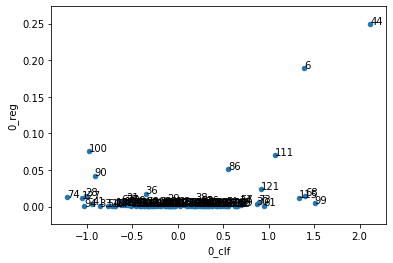

Likeable


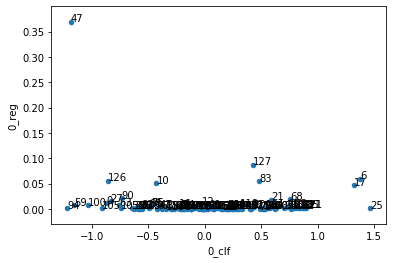

Trustworthy


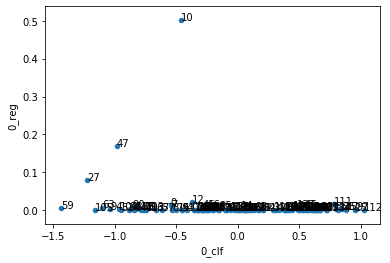

In [120]:
def feature_importance(label):
    reg = Regressor(df, label)
    reg.fit(split=False)
    reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
#     clf = RandomForestClassifier(n_estimators=100)
    clf = LogisticRegression(max_iter=1000)
    X = reg.X
    y = reg.y
    # convert y to binary
    y = (y > 0).astype(int)
    clf.fit(X, y)
    # for random forest
    # clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
    # for coefs
    clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
    imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
    print(label)
    fig, ax = plt.subplots()
    imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
    for k, v in imps.iterrows():
        ax.annotate(k, v)
    plt.show()
#     return reg_imp, clf_imp
feature_importance("Attractive")
feature_importance("Competent")
feature_importance("Dominant")
feature_importance("Extroverted")
feature_importance("Likeable")
feature_importance("Trustworthy")

### Perturbations

For this section, using an SVC model (best suited, and no need for interpretability like in last section).

In [128]:
from keras.preprocessing import image
from regression.feature_extraction import FaceNetExtractionModel
from sklearn.svm import SVC

extraction_model = FaceNetExtractionModel()
# using aligned classifier - better performance
clf = SVC(kernel='linear', probability=True)
clf.fit(X_al, y_al)
cross_val_score(clf, X_al, y_al, cv=kf).mean()

0.9679467485919098

In [129]:
# a sample image
def get_img(name, source, subd, d="data", file="jpg"):
    img_path = "{}/{}/{}/{}.{}".format(d, subd, source, name, file)
    return image.load_img(img_path, target_size=extraction_model.target_size)
sample = features_train.sample()
sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")

(1, 128)


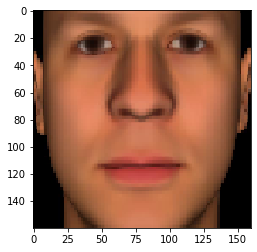

In [130]:
# a sample extraction
from keras.applications.inception_v3 import preprocess_input

img_processed = preprocess_input(image.img_to_array(sample_img)).astype(float)
plt.imshow(img_processed / 2 + 0.5)

# need to load up face net
sample_embedding = extraction_model.model.predict(np.array([img_processed]))
print(sample_embedding.shape)

In [131]:
# a sample classification
def predict_fn(img_arrays):
    embeddings = extraction_model.model.predict(img_arrays)
    preds = clf.predict_proba(embeddings)
    return preds
pred = predict_fn(np.array([img_processed]))
pred

array([[9.99118643e-01, 8.81357327e-04]])

In [132]:
# from https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
from lime import lime_image
from skimage.segmentation import mark_boundaries
from lime.wrappers.scikit_image import SegmentationAlgorithm

segmenter = SegmentationAlgorithm('slic', n_segments=300, compactness=1, sigma=1)

def explain_img(img, name="", ground_truth=None):
    img_processed = preprocess_input(image.img_to_array(img)).astype(float)
    sample_embedding = extraction_model.model.predict(np.array([img_processed]))
    pred = predict_fn(np.array([img_processed]))
    
    explainer = lime_image.LimeImageExplainer()
    print("Image {} w/ ground truth val {}".format(name, ground_truth))
    print("Explaining label {} (p={}) for attribute {}".format(interpret_binary(np.argmax(pred)), pred[:,np.argmax(pred)], label))
    explanation = explainer.explain_instance(
        img_processed, 
        predict_fn, 
        hide_color=0, 
        num_samples=10000,
        segmentation_fn=segmenter,
        num_features=100000
    )
    temp, mask = explanation.get_image_and_mask(
        np.argmax(pred), 
        positive_only=False, 
        num_features=10, 
        hide_rest=False
    )
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_processed / 2 + 0.5)
    ax[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    return explanation

Image  w/ ground truth val None
Explaining label Negative (p=[0.99911864]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


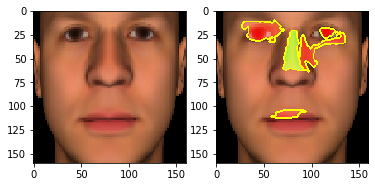

In [133]:
explain_img(sample_img)

Now let's try with a variety of images.

In [145]:
# Several Max Distinct samples (unaligned):
for i in range(3):
    sample = df[df[label].notna()].sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

FileNotFoundError: [Errno 2] No such file or directory: 'data/maxdistinct_aligned/25MaxDistinct_Trustworthy-FineGrain/ID4_Trustworthiness (300 faces)_+100.jpg'

In [ ]:
# Several Random samples:
df_test = merge_x_y(features_test, labels_test)
for i in range(3):
    sample = df_test[df_test[label].notna()].sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "random_aligned")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

**Aligned Todorov Faces**

Do the important features changed when the Todorov faces are cropped and aligned with OpenFace?

## WITHOUT ALIGNMENT ##
Image ID11_Trustworthiness (300 faces)_+150 w/ ground truth val 150.0
Explaining label Positive (p=[0.92074717]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


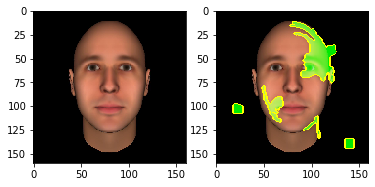

## WITH ALIGNMENT ##
Image ID11_Trustworthiness (300 faces)_+150 w/ ground truth val 150.0
Explaining label Positive (p=[0.99999151]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


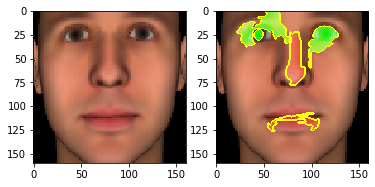

## WITHOUT ALIGNMENT ##
Image ID9_Trustworthiness (300 faces)_-200 w/ ground truth val -200.0
Explaining label Positive (p=[0.74418689]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


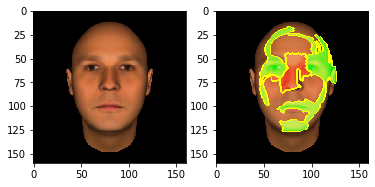

## WITH ALIGNMENT ##
Image ID9_Trustworthiness (300 faces)_-200 w/ ground truth val -200.0
Explaining label Negative (p=[0.9999994]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


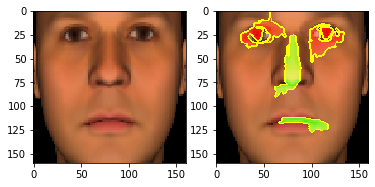

## WITHOUT ALIGNMENT ##
Image ID13_Trustworthiness (300 faces)_-300 w/ ground truth val -300.0
Explaining label Negative (p=[0.99999067]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


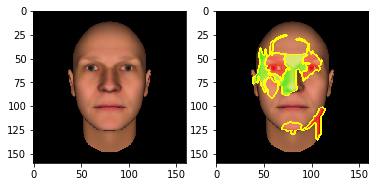

## WITH ALIGNMENT ##
Image ID13_Trustworthiness (300 faces)_-300 w/ ground truth val -300.0
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


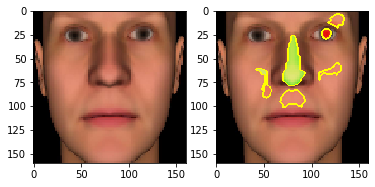

In [136]:
for i in range(3):
    sample = df[df[label].notna()].sample()
    
    print("## WITHOUT ALIGNMENT ##")
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])
    
    print("## WITH ALIGNMENT ##")
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

### Test Sets

Let's do feature analysis on our test sets to see if the model considers the same types of features (is it accurately picking out the faces?)

**Races**

In [137]:
features_races = FeatureExtractor('../data/people_all_aligned').get_features()
features_races

,Face name,Source,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,whiteman_26,whiteman,-0.120427,-0.112989,0.538009,0.206365,2.059582,-1.151321,1.271098,-0.997851,...,0.846254,0.251300,0.610160,-0.385134,0.022353,1.106126,1.344193,-1.048345,-0.693432,1.590746
1,whiteman_32,whiteman,-0.398914,-0.210326,0.321450,-0.724073,-0.140287,-0.149586,-0.565899,1.131615,...,-0.848775,0.473639,0.462771,-2.054000,0.595896,0.837989,1.049333,-1.001882,1.842756,-0.601127
2,whiteman_33,whiteman,-1.982080,0.166773,-0.700815,1.132547,0.469656,-2.566045,0.619717,-1.055190,...,0.376678,1.463964,-1.539297,-0.344475,0.537245,-1.599424,-0.164306,1.017272,0.524281,0.182255
3,whiteman_27,whiteman,-0.225815,-0.756952,-1.834336,0.424554,-1.361912,-1.579291,-1.455853,0.595200,...,-1.984388,0.343742,-1.359184,0.182393,-0.720648,0.767803,-1.125338,-0.734784,-0.998439,-0.744251
4,whiteman_31,whiteman,0.847710,-0.487322,1.542571,-1.052745,-0.427351,-1.236359,1.157078,-1.321119,...,-0.452460,0.495094,-0.066119,-0.642961,-0.404828,-0.325646,1.387969,1.133765,-0.821280,-0.122127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,whitewoman_17,whitewoman,-1.128563,-1.064216,1.451746,0.826682,-0.025061,-1.246133,0.631225,-0.633562,...,0.016296,-0.119650,1.496821,-0.654710,-0.182592,0.902358,-0.250623,-0.472574,-2.054544,1.404982
351,whitewoman_15,whitewoman,-0.411378,0.526657,-0.387023,0.203922,-0.438667,0.642834,0.673981,0.697147,...,1.712283,-0.118373,-0.983721,-1.575052,1.272428,1.744768,1.275348,0.396999,0.103827,0.720538
352,whitewoman_29,whitewoman,0.808578,-0.083400,1.781685,0.460892,-0.654251,-0.304669,-0.765528,0.413353,...,-1.473733,-1.354640,-0.439554,-1.490577,0.381323,1.382702,0.678508,-0.494090,0.196452,-1.181952
353,whitewoman_28,whitewoman,-0.455744,0.585054,-0.561204,-1.532791,0.207656,-1.294957,0.508649,1.801937,...,-0.328341,-2.370982,0.536624,0.494539,-1.490695,-0.666481,-1.621961,-1.142885,-1.592400,-1.067421


Image whiteman_38 w/ ground truth val whiteman
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


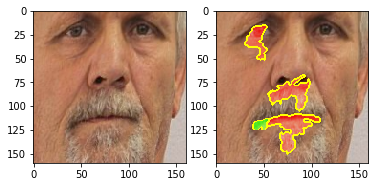

Image whiteman_54 w/ ground truth val whiteman
Explaining label Negative (p=[0.96384082]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


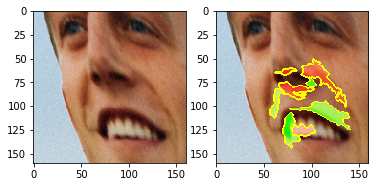

Image blackman_2 w/ ground truth val blackman
Explaining label Positive (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


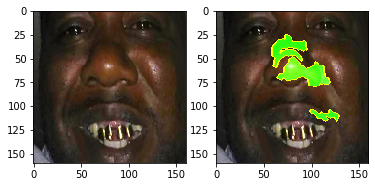

In [138]:
for i in range(3):
    sample = features_races.sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "people_all_aligned", d="../data", file="png")
    explain_img(sample_img, sample['Face name'].values[0], sample['Source'].values[0])

**Politicians**

In [139]:
features_pol = FeatureExtractor('../data/politicians-database_aligned').get_features()
features_pol

,Face name,Source,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,S2000PA0140T0279,Senate_all_stimuli,-0.504370,0.013723,0.055881,0.287904,-0.662192,-0.499609,-1.460507,-0.305809,...,0.742018,-0.257383,0.603962,0.582895,0.261593,0.546300,-0.413315,-0.272277,1.120216,0.596841
1,S2000NM0137T0273,Senate_all_stimuli,-0.957991,-0.448602,-0.213101,0.888897,-0.726301,-0.312928,-1.792738,1.206947,...,-1.530963,-1.055058,-1.670828,1.293266,0.168615,0.766207,0.961013,-0.068101,1.109866,-0.866282
2,S2002ID0094T0187,Senate_all_stimuli,-0.621991,-0.408908,0.463894,-0.778147,-0.967455,-0.644616,0.452949,-1.958304,...,-1.384667,1.310473,-0.210076,1.732538,-0.153568,0.414991,0.174138,-0.120255,1.557842,0.871784
3,S2006DE0030T0059,Senate_all_stimuli,1.081849,-0.090449,-0.006391,-0.622637,-2.089592,0.254567,-0.995594,0.152639,...,-0.254750,-0.630106,-0.360636,2.185415,-0.436433,0.123446,-0.111207,1.081651,-0.144625,-1.673493
4,S2004NY0077N0154,Senate_all_stimuli,0.615615,1.790460,-2.085173,0.362829,-0.397560,-0.356010,-0.850126,0.598258,...,0.309932,2.511626,0.150356,0.440951,-1.497452,1.490744,0.879199,-0.162823,1.558933,0.920751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,G2002NH0207T0413,Governors_all_stimuli,-0.486404,0.623814,-2.521637,0.090685,1.061097,-1.628269,-0.889039,0.072129,...,-0.696708,1.478624,-0.607418,-0.276661,0.223835,0.826025,0.445677,-0.811373,-0.764403,0.519917
539,G2002NY0209N0418,Governors_all_stimuli,-1.711383,-0.436176,-1.596964,0.555495,1.641054,0.162049,0.843936,1.127946,...,-0.083439,1.440380,-0.606373,-0.273260,0.120701,1.301504,2.038320,-0.362747,0.106679,3.051418
540,G2002ME0200T0399,Governors_all_stimuli,0.978925,-0.274942,-0.004337,-1.012338,-1.270417,1.433950,0.551634,-0.542996,...,0.905038,0.694419,-2.327972,2.942603,-0.113280,1.535800,1.393003,1.468831,0.233113,-0.522482
541,G2000WA0232T0463,Governors_all_stimuli,0.746103,-0.533349,-1.388844,-1.018059,0.636981,0.759564,0.002630,0.547079,...,-0.060348,0.944609,2.170251,-0.520957,-0.353060,1.145909,0.645721,-0.222271,1.384932,0.165043


Image S2004SD0083N0166 w/ ground truth val None
Explaining label Negative (p=[0.99997013]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


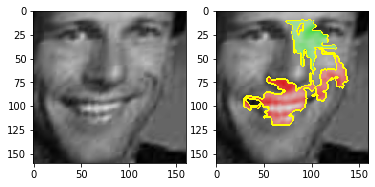

Image S2000WV0149N0298 w/ ground truth val None
Explaining label Positive (p=[0.85351839]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


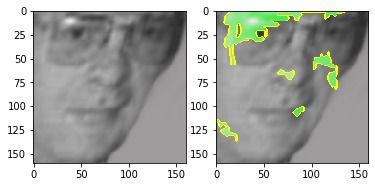

Image G1996DE0265T0529 w/ ground truth val None
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


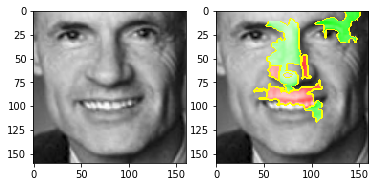

In [140]:
for i in range(3):
    sample = features_pol.sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "politicians-database_aligned", d="../data", file="png")
    explain_img(sample_img, sample['Face name'].values[0])

**Occupations**

In [141]:
features_occ = FeatureExtractor('../data/occupations_aligned').get_features()
features_occ

,Face name,Source,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,librarian_15,librarian,-0.755986,1.661668,1.199935,-0.265518,-0.035301,0.607240,0.791605,-1.181459,...,0.081642,-1.476633,1.466021,0.920817,1.395680,-2.184989,-0.379073,-0.158153,0.108643,0.190498
1,librarian_16,librarian,-0.842984,-0.996406,-0.660735,0.583563,-2.237615,-0.127245,-1.087441,-0.524090,...,-0.163028,-2.226707,-0.944911,-0.322927,1.208646,0.330323,1.708959,0.236227,-1.742784,1.529521
2,librarian_11,librarian,-1.055891,-0.462559,1.196768,-0.653962,-0.364850,0.285804,-0.711626,-0.732676,...,2.171845,1.053082,0.498215,-0.673385,0.830614,0.303925,1.000791,0.623020,0.822566,1.232318
3,librarian_38,librarian,0.314472,0.060783,-0.059542,-2.398128,-1.352358,-0.111647,1.262194,0.377884,...,0.751890,-1.321318,-0.196909,2.193202,0.586605,1.170120,0.929881,0.625935,0.450536,-0.800056
4,librarian_63,librarian,-1.315515,-1.102359,0.581281,-0.405512,0.074006,0.173378,-0.117512,0.557073,...,1.203941,-0.741812,0.541792,0.007457,-0.061415,0.444842,1.228816,-0.470051,0.268514,1.338153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Psychologist_28,Psychologist,-0.004690,-0.884721,0.186241,-0.271912,1.101014,0.594442,0.321557,0.220296,...,-0.072430,-2.473292,-0.903110,0.414662,0.899311,2.190902,-1.020135,0.268861,-0.854796,0.811343
495,Psychologist_29,Psychologist,-0.353894,-0.403945,0.219062,-0.603678,-1.116561,-0.259020,-1.815508,-1.204569,...,-0.664755,-1.343770,-0.805995,0.758173,1.615443,0.221681,0.525344,-0.496415,-0.509848,0.334896
496,Psychologist_39,Psychologist,-0.567822,-0.652377,-1.162361,0.973418,-0.316941,0.306196,-0.728105,-0.942703,...,-0.630146,0.406025,-0.527935,-0.393807,0.427172,-0.867550,0.161739,0.593506,0.344709,-0.969718
497,Psychologist_11,Psychologist,-0.690261,0.234893,1.926752,-0.499888,-0.678807,-1.035267,-0.867173,-0.399755,...,-0.847956,-1.438293,-0.972441,0.080987,0.899683,0.175037,0.841643,-0.592364,0.129618,0.648385


Image Psychologist_23 w/ ground truth val Psychologist
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


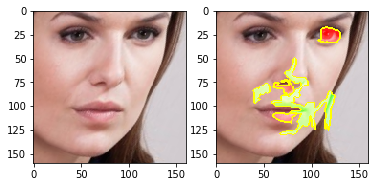

Image physician_38 w/ ground truth val physician
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


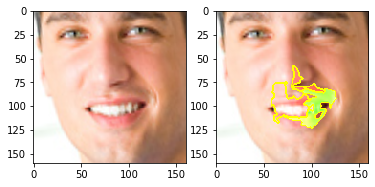

Image artist_83 w/ ground truth val artist
Explaining label Negative (p=[0.77779485]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


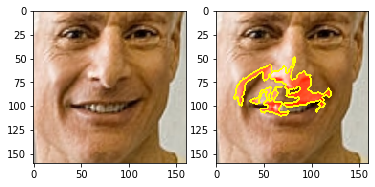

In [142]:
for i in range(3):
    sample = features_occ.sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "occupations_aligned", d="../data", file="png")
    explain_img(sample_img, sample['Face name'].values[0], sample['Source'].values[0])

**Average Faces**

In [143]:
features_avg = FeatureExtractor('../data/average-faces').get_features()
features_avg

,Face name,Source,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,chineseaverageman,pacific,1.006130,-0.958632,-1.836731,-0.227564,-0.428968,-1.582484,-0.526346,-0.237548,...,-0.116558,0.433578,1.284410,-1.099854,0.109383,0.004389,0.706189,-1.436866,-1.092394,-1.191460
1,averagecambodianman,pacific,0.508327,0.871377,-1.794836,0.713659,-1.261089,-0.516690,-0.344674,-0.902560,...,-0.296848,1.661258,1.457717,-1.380862,0.917038,-0.829780,-0.368157,-0.558379,-0.966315,-0.547256
2,averagesamoanfemale,pacific,0.335832,-1.206490,-1.524714,-1.328249,-0.880043,-1.310339,0.127562,0.151277,...,0.039747,0.761324,2.235982,0.215930,-0.351985,-0.529869,0.035931,-1.286921,-1.183124,-1.173574
3,thaiaverageman1,pacific,1.420141,-1.054282,-1.242779,-0.285154,0.508278,-1.093108,0.774807,-0.544474,...,-0.704781,-0.344809,1.449978,-0.002386,0.496873,0.018947,0.107298,-1.570550,-2.194851,-0.628066
4,averagetibetanman,pacific,0.799098,-0.525255,-1.635956,-1.475314,0.751182,-1.900503,-0.397208,0.543503,...,-0.759381,0.557020,0.521101,-0.813223,0.071259,0.019052,-0.153074,-1.668976,-1.885755,-0.870801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,puertoricanfemale,americas,-0.016879,-0.398424,0.616726,0.057346,-0.700612,0.826921,1.098311,-0.955775,...,-0.563409,1.868846,1.528543,0.531592,0.081050,-0.724306,-0.462149,1.906524,-0.872072,-1.480266
107,whiteamericanfemale,americas,-1.458237,0.504689,1.400234,-0.831411,-0.386490,-1.534640,0.830080,-0.593592,...,0.914350,0.497513,2.188133,-0.702375,0.305426,-0.655874,0.532348,0.082747,0.156517,-0.165948
108,averagebrazilianwoman,americas,-1.328095,-0.256826,-0.691086,-0.074129,-0.057393,0.029083,0.169218,-0.268235,...,-0.480196,2.112608,1.051052,0.835937,0.056196,-0.434951,-0.867806,2.097346,-0.188359,-0.568005
109,averageperuvianwoman,americas,0.257849,-0.528111,-0.188699,-0.759983,1.497392,0.144184,0.750892,-0.874644,...,-0.668661,1.361992,0.821704,0.256739,0.294750,-1.839570,-0.628408,2.203919,-0.649680,-0.967736


Image averagesamoanmale w/ ground truth val pacific
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


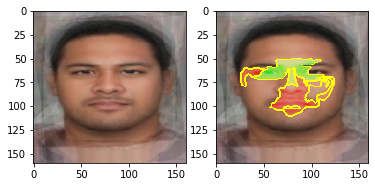

Image average-west-africanfemale w/ ground truth val africa
Explaining label Positive (p=[1.]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


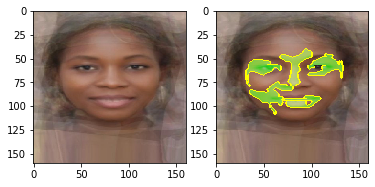

Image chadcameroon w/ ground truth val africa
Explaining label Positive (p=[0.99999951]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


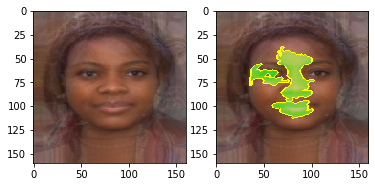

In [144]:
for i in range(3):
    sample = features_avg.sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "average-faces", d="../data")
    explain_img(sample_img, sample['Face name'].values[0], sample['Source'].values[0])